#### Import the required libraries we need for the lab.


In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = requests.get(URL)
    
data_url = io.StringIO(resp.text)

#### Read the dataset in the csv file from the URL


In [9]:
boston_df = pd.read_csv(data_url)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot:

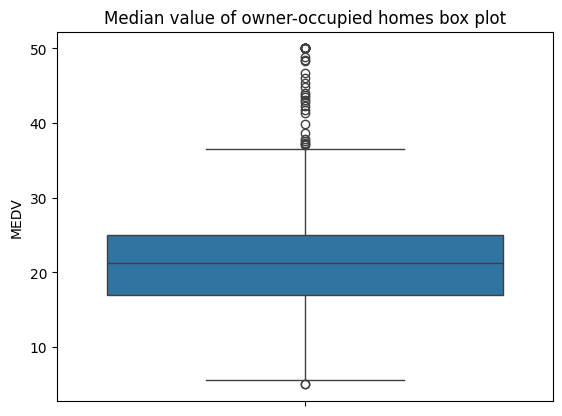

In [35]:
ax = sns.boxplot(y="MEDV", data=boston_df).set_title('Median value of owner-occupied homes box plot')
plt.show()

### Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Count of houses not near Charles river VS houses near Charles river')

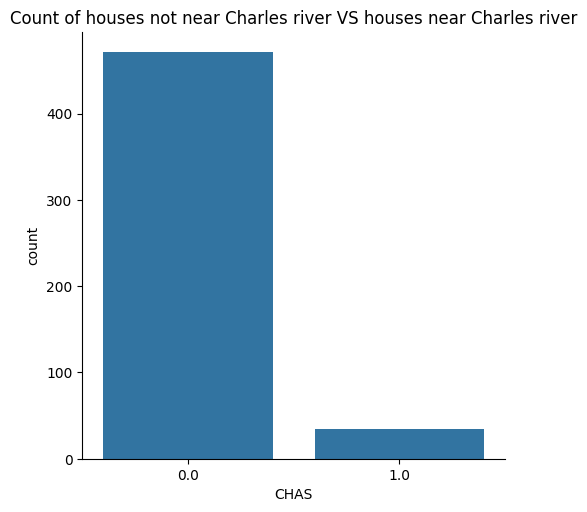

In [75]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Count of houses not near Charles river VS houses near Charles river')



### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


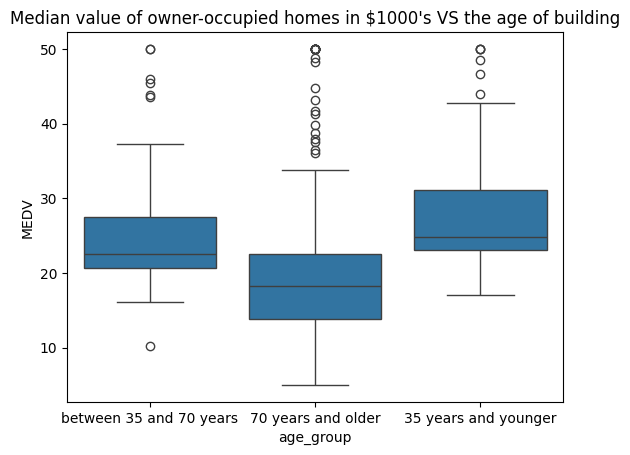

In [32]:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


ax = sns.boxplot(y='MEDV', x='age_group', data=boston_df).set_title('Median value of owner-occupied homes in $1000\'s VS the age of building')
plt.show()


### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


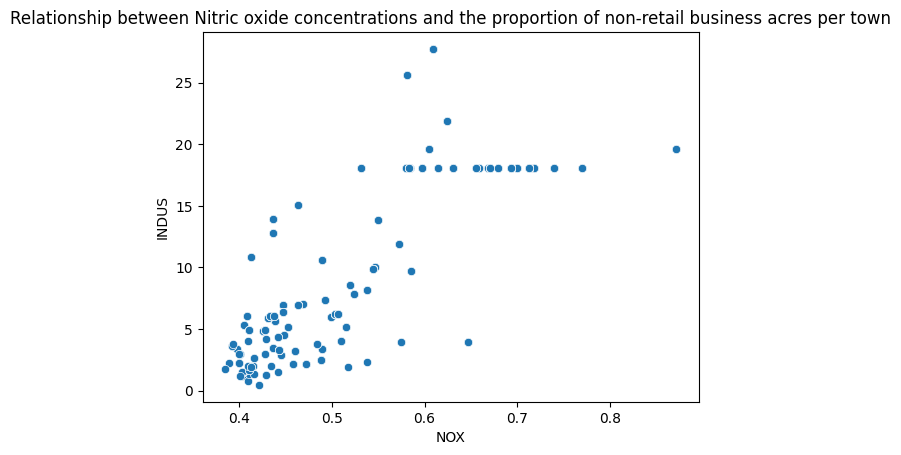

In [39]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

At the plot we could see corelation btw NOX and INDUS values.


### Create a histogram for the pupil to teacher ratio variable

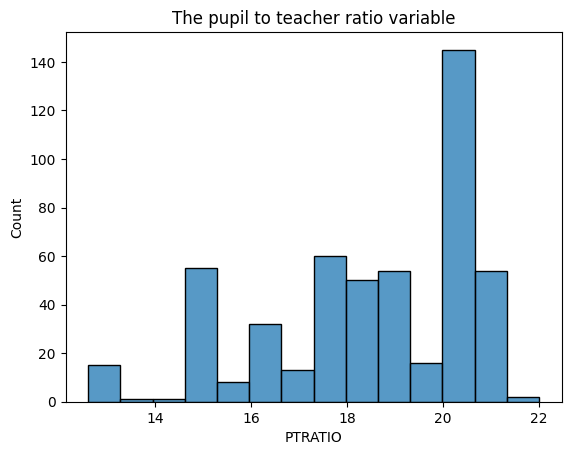

In [72]:
sns.histplot(x = "PTRATIO", data = boston_df)

plt.title('The pupil to teacher ratio variable')

plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.
Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.


### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



State the hypothesis

*   H0: there is no significant difference in median value of houses bounded by the Charles river
*   H1: there is a significant difference in median value of houses bounded by the Charles river


/var/folders/ds/2qgp70093yn5xggszmj318xm0000gq/T/ipykernel_39697/1719449669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

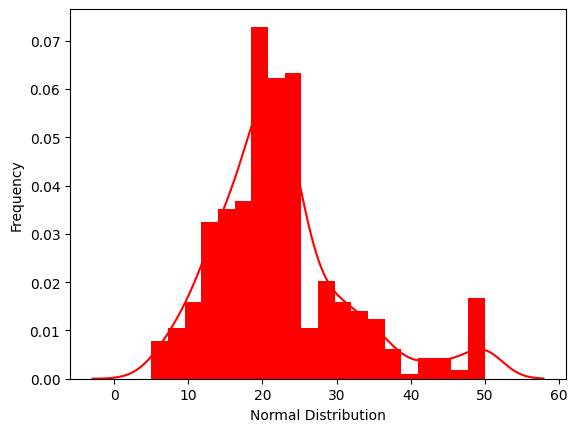

In [54]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## it is not normal distribution, so equal_var should be False

In [55]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that is significant difference in median value of houses bounded by the Charles river

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



State the hypothesis

*   H0: there is no a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
*   H1: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

    

In [56]:

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [58]:
#First, separate the three samples (one for each job category) into a variable each.
lower_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
btw_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
# run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(lower_35, btw_35_70, older_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will rejected the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis

* H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
* H1: there is there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [59]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Conclusion: Since the p-value is less than 0.05, we will rejected the null hypothesis as there is significant evidence that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: There are no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

H1: There is a correlation btw additional weighted distance to the five Boston employment centres and the median value of owner occupied homes

In [62]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        21:21:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


R-square is 0.062, R will be √0.062, correlation coefficient is 0.25. There is a low correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes ut they still move in the same direction some of the time

In [63]:
0.062**(1/2)

0.24899799195977465